# ELE 435/535 Homework 6

## Unconstrained Optimization Using Gradient Descent

In this homework, we will examine the minimization of functions using gradient descent. We examine the convergence rate for convex and strongly convex functions. We also note that the convergence rate depends on the characteristics of the problem.

Credits: Parts 1 and 2 of this assignment have been adapted from practicals by Francis Bach, Alexandre d'Aspremont, Pierre Gaillard and Aude Genevay.

## Preliminaries 

### Gradient Descent

Let $f\colon \mathbb{R}^n \rightarrow \mathbb{R}$ be differentiable with gradient $\nabla f(x)$. Gradient descent attempts to find a local minimum of $f$ using the iterative algorithm:
$$
x_{t+1} = x_t -\gamma \nabla f(x_t),\quad x_0\in \mathbb{R^n}.
$$

In order to ensure convergence to a local minimum the fixed step size $\gamma$ can't be too big. The standard fixed step size is $\gamma = 1/L$  where $L$ is a uniform upper bound on the largest eigenvlaue of $\nabla^2f(x)$.
    
### Linear Convergence

When the rate of convergence of an iterative optimization algorithm satisfies 

$$
|f(x_t)-f(x^\star)| \leq C \alpha ^t
$$

for some constant $0< \alpha <1$, the error $|f(x_t)-f(x^\star)|$ converges to $0$ exponentially in $t$. By taking logs of both sides you see that 

$$
\log (|f(x_t)-f(x^\star)|)\leq t \log(\alpha) + \log (C).
$$

This is also termed "linear convergence".

### Ridge Regression

We will examine the ridge regression problem: 

$$\min_{x \in \mathbb{R}^n}\  f(x) = \frac{1}{2m}\|y - F x\|^2+\frac{\lambda}{2} \|x\|^2$$

Here $F \in \mathbb{R}^{m \times n}$ is a given matrix and $y \in \mathbb{R}^m$ is a given vector. The constant $\lambda$ is a hyperparameter that weights the relative importance of the second term versus the first in $f(x)$. The function to be minmized is a quadratic function of $x$.

We have selected this problem as a testbed since it has a known solution. The optimal $x^\star$ for the ridge regression problem is

$$
x^\star = (F^T F + m\lambda I)^{-1}F^T y.
$$

What we want to explore the convergence rate of gradient descent to the known solution.

### Before Starting the Computational Exercises

You will need to find: $\nabla f(x)$ and $\nabla^2 f(x)$ for the ridge regression problem. Also consider whether $f(x)$ is strongly convex. If so, determine the maximum value of $c$ for which it is $c$-strongly convex.

ANS: $\nabla f(x) = \left (\frac{1}{m} F^TF + \lambda I_n \right ) x - \frac{1}{m} F^T y$

ANS: $\nabla^2f(x) = \frac{1}{m}F^T F + \lambda I_n$ 

ANS: $f(x)$ is strongly convex since $f(x) -\frac{\lambda}{2}\|x\|_2^2$ is convex. It is hence also strictly convex and convex. To find the largest $c$ for which it is $c$-strongly convex expand $f(x)$ to find the quadratic term. Subtractinhg $\frac{c}{2} x^Tx$ from this term yields
    $$
    x^T \left (\frac{1}{2m} F^TF + \frac{\lambda}{2} I -\frac{c}{2} I\right ) x\ +\ ...
    $$
To ensure the result is convex we need the quadratic term to be PSD. Hence
    $$
    c \leq \lambda + \frac{1}{m} \lambda_{\min}(F^TF).
    $$

# Computational Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

## 1. Warm-up: strongly convex versus strictly convex

### Two scalar functions 

(a) Write a python function to compute and return $f_1(x)=x^2$ and $\nabla f_1(x)$.

(b) Write python function to compute and return $f_2(x)=x^4$ and $\nabla f_2(x)$.

(c) Code a gradient descent algorithm that calls the appropriate functions defined above and computes the minimum of the function. Use a step size $\gamma = 0.1$, a maximum of $200$ interations, and stopping criterion $|\nabla f(x)|< \epsilon =10^{-3}$.

(d) Plot $|x_t-x^\star|$ versus the number of iterations $t$, where $x_t$ is the $t$-th iterate of gradient descent and $x^\star$ is the known solution. To display the convergence speed of the algorithms, plot in a logarithmic scale. For this you may find the Python functions `semilogx, semilogy, loglog` useful. Display convergence plots for both functions on one graph. How and why are the plots different?

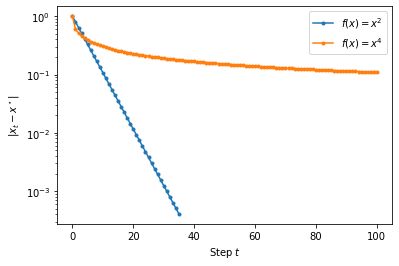

In [2]:
# define the objective function x^2

def f1(x):
    return x ** 2, 2 * x


# define the objective function x^4

def f2(x):
    return x ** 4, 4 * x ** 3


# GD Parameters
gamma = 1/10
n_iter_max = 100
eps = 10**(-3)  # stopping criterion

# Initialisation
x_init = 1.0

# f_star
f_star = 1.0

# Gradient descent
# your code here

# return x_star, x_values, f_values
def gradient_descent(f, x_init, gamma, eps_grad_f, n_iter_max = np.Inf):
    f_x_init, grad_f_x_init = f(x_init)
    if n_iter_max == 0 or np.linalg.norm(grad_f_x_init) < eps_grad_f:
        return x_init, [x_init], [f_x_init]
    x_next = x_init - gamma * grad_f_x_init
    x_final, x_values, f_values = gradient_descent(f, x_next, gamma, eps_grad_f, n_iter_max - 1)
    return x_final, [x_init] + x_values, [f_x_init] + f_values

x1_star, x1_values, f1_values = gradient_descent(f1, x_init, gamma, eps, n_iter_max)
x2_star, x2_values, f2_values = gradient_descent(f2, x_init, gamma, eps, n_iter_max)

plt.figure()
plt.semilogy(x1_values, '-o', markersize=3, label="$f(x)=x^2$")
plt.semilogy(x2_values, '-o', markersize=3, label="$f(x)=x^4$")
plt.xlabel('Step $t$')
plt.ylabel(r'$|x_t - x^\star|$')
plt.legend()
plt.show()

## 2. Ridge Regession

### Step 1: Generate F and y

(a) Generate a random matrix $F \in \mathbb{R}^{m \times n}$ of size $m=50$ and $n=60$ where each row of $F$ belongs to $[0,1]^n$. The numpy cammand `np.random.rand` may be useful. Note that $F$ will have linearly dependent columns. Why?

(b) Model $y$ as $Fx + w$ where $x\in \mathbb{R}^n$ and $w$ is a normally distributed noise vector in $\mathbb{R}^m$. Generate $x \in [0,1]^n$. Then generate a target vector $y \in \mathbb{R}^m$. The numpy command `random.randn` may be useful. 

ANS: The number of columns in $F$ is greater than the number of rows. Hence the rank of $F$ is at most the number of rows. So the columns must be linearly dependent.

In [3]:
n = 60 # dimension of x
m = 50  # number of data points

# your code here

F = np.random.rand(m, n)
x = np.random.rand(n, 1)
w = np.random.randn(m, 1)
y = F @ x + w

### Step 2: Numerically compute the solution of ridge regression

(a) Numerically compute the largest eigenvalue and smallest eigenvalue of $\nabla^2 f(x) = P = \frac{1}{m}F^T F + \lambda I$. These will be used to set the constant step size in gradient descent and to bound the rate of convergence.

In addition, compute and display the condition number of the matrix:
$$\frac{\lambda_{\max}(P)}{\lambda_{\min}(P)}.$$
A very large condition number is a cautionary warning. Investigate what happens for small $\lambda$ values (say, $\lambda=0.01$). Report your observations and interpretation below.

(b) Now compute $x^\star$ and $f(x^\star)$ numerically. It's good practice to avoid computing a matrix inverse. Instead solve a set of linear equations. See the numpy command `linalg.solve`.

ANS: The matix $F$ has more columns than rows and hence $F^TF$ must be singular. Adding $\lambda I_n$ moves the matrix away from singularity, the larger the value of $\lambda$ the more distant it is from being singular. As $\lambda\rightarrow 0$ the matrix $M$ will approach singularity and $\kappa(M) \uparrow \infty$.

In [4]:
reg = 1.0         # regularization parameter (lambda)

# component terms

P = 1 / m * F.T @ F + reg * np.eye(n)
eigvals, _ = np.linalg.eigh(P)
eigval_min = eigvals.min()
eigval_max = eigvals.max()
cond = eigval_max / eigval_min
print(f"Min eigenvalue: {eigval_min}, Max eigenvalue: {eigval_max}, Condition number: {cond}.")

# Note that P is a symmetric matrix

# solve ridge regression

x_solved = np.linalg.solve(P * m, F.T @ y)
f_x_solved = 1 / (2 * m) * np.linalg.norm(y - F @ x_solved) ** 2 + reg / 2 * np.linalg.norm(x_solved) ** 2
print(f"Solution: x = {x_solved.T}, f(x) = {f_x_solved}.")

Min eigenvalue: 0.999999999999999, Max eigenvalue: 16.086896758426363, Condition number: 16.08689675842638.
Solution: x = [[0.42335984 0.40573989 0.53764347 0.42772377 0.45766214 0.40777517
  0.43232776 0.43894705 0.51060507 0.4737137  0.50290259 0.52016288
  0.5440182  0.49696284 0.50570322 0.35966188 0.53078585 0.46487028
  0.48301682 0.5023004  0.44309183 0.49066239 0.44144084 0.55990521
  0.43761114 0.49588664 0.45893058 0.52590379 0.44476598 0.52802392
  0.48807954 0.4508931  0.56713144 0.47828219 0.39173884 0.50786917
  0.39053121 0.49485367 0.57822854 0.48421368 0.46009018 0.42501223
  0.42115373 0.46439141 0.55100194 0.45318274 0.46735504 0.37535671
  0.4507916  0.47512034 0.39731297 0.34874974 0.45430835 0.48809337
  0.44044464 0.51775935 0.51350335 0.37142379 0.36436841 0.4562614 ]], f(x) = 7.756679492369232.


### Step 3: Solve ridge regression using gradient descent

Now that we know the solution $x^\star$ and the largest and smallest eigenvalues of $P$ and we can explore the convergence of gradient descent with both constant stepsize and variable step size.

(a) Put your code from the above steps together into one new code block to implement gradient descent using the standard constant step-size to numerically find the vector $x_*$ that minimizes the ridge regression function and the minimum value of the function. 

* Use $\lambda = 1.0$.

* Stopping criterion: $\|\nabla f(x)\|_2 < \epsilon = 10^{-3}$. The numpy command `linalg.norm` may be useful. 

* Set the constant step size $\gamma$ using largest eigenvalue of $\nabla^2f(x)$. 

(b) Display your results by plotting $\|x_t-x^\star\|_2$ versus the number of iterations $t$, where $x_t$ is the $t$-th iterate of gradient descent and $x^\star$ is the pre-computed ridge regression solution. The convergence speed of algorithms is displayed by plotting in a logarithmic scale. For this you may find the Python functions `semilogx, semilogy, loglog` useful. Your plot should be a straight line.

(c) For a quadratic objective is easy to solve $\gamma_t =\arg\min_\gamma f(x_t-\gamma \nabla f(x_t) )$ to find the optimal step size at step $t.$ The solution gives
$$
\gamma_t = \frac{g_t^Tg_t}{g_t^T P g_t}
$$
where $g_t = \nabla f(x_t)$ and $P$ is the symmetric PD matrix in the quadradtic.
Add to your code an implementation of gradient descent using the optimal variable step size (given above) to find the minimum and minimum value of the ridge regression function. Use the same parameters as in part (a).
To aid comparison, plot your convergence results on the same graph produced in part (b).


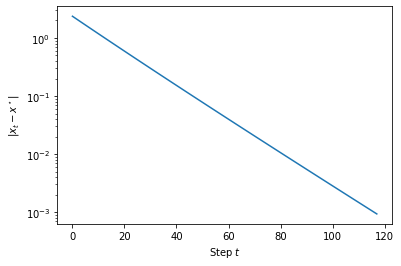

In [5]:
# Your code to specify n, m, and select F and y

n = 60 # dimension of x
m = 50  # number of data points

F = np.random.rand(m, n)
x = np.random.rand(n, 1)
w = np.random.randn(m, 1)
y = F @ x + w

reg = 1.0         # regularization parameter (lambda)

# component terms

P = 1 / m * F.T @ F + reg * np.eye(n)
eigvals, _ = np.linalg.eigh(P)
eigval_min = eigvals.min()
eigval_max = eigvals.max()
cond = eigval_max / eigval_min

# Note that P is a symmetric matrix

# solve ridge regression

x_solved = np.linalg.solve(P * m, F.T @ y)
f_x_solved = 1 / (2 * m) * np.linalg.norm(y - F @ x_solved) ** 2 + reg / 2 * np.linalg.norm(x_solved) ** 2

# your code here

def f_ridge(x):
    return (
        1 / (2 * m) * np.linalg.norm(y - F @ x) ** 2 + reg / 2 * np.linalg.norm(x) ** 2,
        (1 / m * F.T @ F + reg * np.eye(n)) @ x - 1 / m * F.T @ y
    )

x_init = np.random.rand(n, 1)
gamma = 1 / eigval_max
eps = 1e-3

x_ridge_star, x_ridge_values, f_ridge_values = gradient_descent(f_ridge, x_init, gamma, eps)
plt.figure()
plt.semilogy(np.linalg.norm((np.array(x_ridge_values) - x_solved).reshape(-1, n), axis=1))
plt.xlabel('Step $t$')
plt.ylabel(r'$|x_t - x^\star|$')
plt.show()


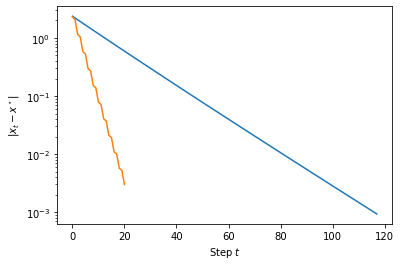

In [6]:
# Gradient Descent

# Your definition of python function to return ridge function value and gradient


# regularization parameter (lambda)
reg = 1.0

def f_ridge_optimal(x):
    grad_x = (1 / m * F.T @ F + reg * np.eye(n)) @ x - 1 / m * F.T @ y
    gamma_grad_x = (grad_x.T @ grad_x) / (grad_x.T @ P @ grad_x) * grad_x
    return (
        1 / (2 * m) * np.linalg.norm(y - F @ x) ** 2 + reg / 2 * np.linalg.norm(x) ** 2,
        gamma_grad_x
    )

x_init = np.random.rand(n, 1)
x_ridge_optimal_star, x_ridge_optimal_values, _ = gradient_descent(f_ridge_optimal, x_init, 1, eps, 100)

plt.figure()
plt.semilogy(np.linalg.norm((np.array(x_ridge_values) - x_solved).reshape(-1, n), axis=1))
plt.semilogy(np.linalg.norm((np.array(x_ridge_optimal_values) - x_solved).reshape(-1, n), axis=1))
plt.xlabel('Step $t$')
plt.ylabel(r'$|x_t - x^\star|$')
plt.show()

### Part 3: Logistic Regression

Now you will write code to execute gradient descent with a constant step size to train a logistic regression classifier by minimizing the cross-entropy loss.

(a) First write code to generate $nx=100$ random Gaussian examples in $\mathbb{R}^2$ from two classes with means $\mu_1,$ and $\mu_2.$ You can asume the Gaussian densities are circularly symmetric.
One way to do  this is store the class 0 data in an array X0, and class 1 data in an array X1. You will also need to have corrsponding arrays the labels.

You then then augment the X0, X1 arrays to account for the offset parameter. Finall you can pack these togther using np.hstack() and np.vstack() to get two final arrays one the augmented X and one for the labels.



In [7]:
# Generate 2D data from two Gaussian sources woth labels 0 and 1

nx = 100        #number of examples per class
mu0=1.0
sig0=0.8
mu1= -1.0
sig1=0.5
#---------------------------------------------

#Your Code Here

x0 = np.random.randn(nx, 3) * np.array([sig0, sig0, 0]) + np.array([mu0, mu0, 1])
x1 = np.random.randn(nx, 3) * np.array([sig0, sig0, 0]) + np.array([mu1, mu1, 1])
x  = np.vstack((x0, x1)).T
labels = (np.arange(2 * nx) >= nx) * 1


(b) Write three functions:  
(1) Function one takes as input a scalar z and returns $\sigma(z)=\frac{1}{1+e^{-z}}$.  
(2) Function two takes as input the data X, y and the parameter $w \in \mathbb{R}^3$ and the total cross-entropy loss of $w$.  
(3) Function three takes the same inputs as function two and returns the gradient of the cross-entropy loss.

In [8]:
# Your code here

def sigma(z):
    return 1 / (1 + np.exp(-z))

def total_ce_loss(X, y, w):
    q = sigma(w.T @ X)
    H = -(y * np.log(q) + (1 - y) * np.log(1 - q)).mean()
    return H

def total_ce_loss_grad(X, y, w):
    return (sigma(w.T @ X) - y) @ X.T / X.shape[1]


(c) Now write code to execute gradient descent to minimize the cross-entropy loss by iterative updating the parameter vector $w\in \mathbb{R}^3$.  
Plot your results on two plots:  
(a) In the first plot show the total loss $J(w)$ versus the interation index $t$. Use a log axis for the total loss.  
(b) Plot the training data (color coded by class), the initial value of the vector component of $w$ in $\mathbb{R}^2$, the final version of this vector, and the final decision hyperplane. 

[-2.46646951 -2.36357824 -0.03674871]


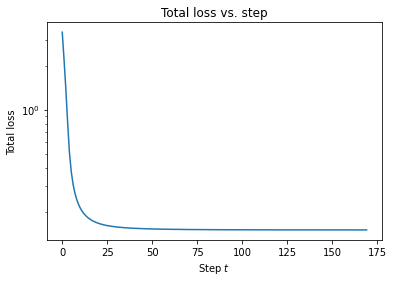

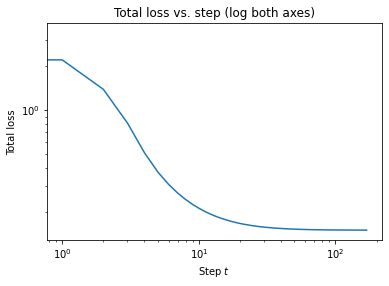

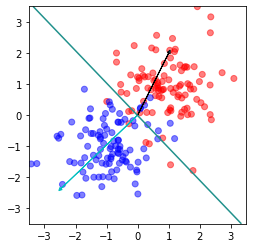

In [9]:
# Train Logistic Regression

def logistic(w):
    return total_ce_loss(x, labels, w), total_ce_loss_grad(x, labels, w)

w_initial = np.array([1, 2, 3])
w_star, w_values, total_ce_loss_values = gradient_descent(logistic, w_initial, 1, 1e-3)
print(w_star)

plt.figure()
plt.semilogy(total_ce_loss_values)
plt.title('Total loss vs. step')
plt.xlabel('Step $t$')
plt.ylabel(r'Total loss')
plt.show()

plt.figure()
plt.loglog(total_ce_loss_values)
plt.title('Total loss vs. step (log both axes)')
plt.xlabel('Step $t$')
plt.ylabel(r'Total loss')
plt.show()

labels_inferred = (w_star.T @ x >= 0) * 1

# Hyperplane
X, Y = np.meshgrid(np.linspace(-3.5, 3.5, 200), np.linspace(-3.5, 3.5, 200))
Z = (np.array([X, Y, 0 * X + 1]).T * w_star).sum(axis=-1).T

plt.figure()
ax = plt.axes()
plt.scatter(x[0, :], x[1, :], color=np.array(['red', 'blue'])[labels], alpha=0.5)
plt.contour(X, Y, Z, 0)
ax.arrow(0, 0, *w_star[:2], head_width=0.1, head_length=0.1, fc='c', ec='c')
ax.arrow(0, 0, *w_initial[:2], head_width=0.1, head_length=0.1)
axes = plt.gca()
plt.xlim([-3.5, 3.5])
plt.ylim([-3.5, 3.5])
axes.set_aspect(1)
plt.show()